<a href="https://colab.research.google.com/github/May-Xiaoting-Zhou/-CS577_Deep-Learning_Project/blob/main/CS579_Florida's_26th_Congressional_District_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

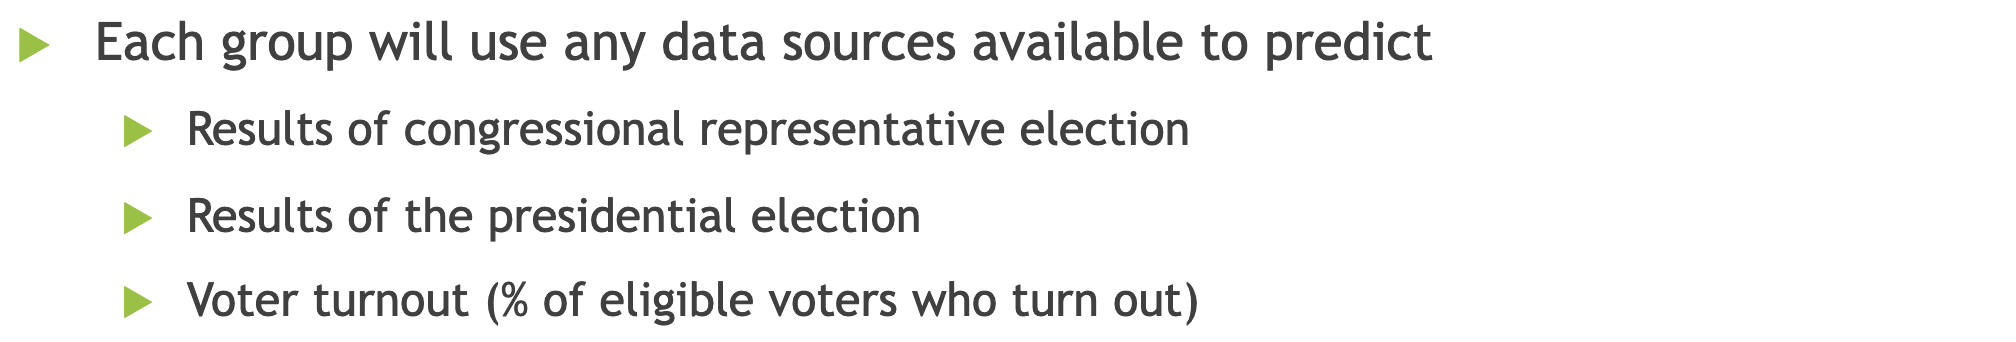

Instructions:

	1.	Data loading and preprocessing: Replace the file paths with the actual dataset paths for congressional, presidential, and voter turnout data.
	2.	Exploratory Data Analysis: This section helps visualize the distribution and correlations in the data.
	3.	Data Cleaning: Handles missing data and removes outliers.
	4.	Feature Selection and Scaling: Key features are selected based on relevance, and the data is scaled for model training.
	5.	Spatial Analysis: Uses GIS data to visualize voter turnout spatially.
	6.	Model Training and Evaluation: Trains a logistic regression model on the data and evaluates its performance.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import geopandas as gpd

# Load data (replace with actual data file paths)
congress_data = pd.read_csv('congressional_elections.csv')
president_data = pd.read_csv('presidential_elections.csv')
voter_turnout = pd.read_csv('voter_turnout.csv')
gis_data = gpd.read_file('florida_gis_data.shp')

# 1. Exploratory Data Analysis (EDA)
# Display the first few rows of the data
print(congress_data.head())
print(president_data.head())
print(voter_turnout.head())

# Summary statistics
print(congress_data.describe())
print(president_data.describe())
print(voter_turnout.describe())

# Correlation matrix
corr_matrix = congress_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Congressional Data')
plt.show()

# 2. Data Cleaning
# Handling missing data
congress_data.fillna(method='ffill', inplace=True)
president_data.fillna(method='bfill', inplace=True)
voter_turnout.dropna(inplace=True)

# Remove outliers based on z-scores
from scipy import stats
congress_data = congress_data[(np.abs(stats.zscore(congress_data)) < 3).all(axis=1)]

# 3. Data Selection
# Feature selection
# Use correlation threshold or feature importance to select important features
selected_features = ['voter_age', 'education_level', 'income', 'previous_turnout']

# Train-test split
X = congress_data[selected_features]
y = congress_data['election_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Dimensionality Reduction (Optional)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 5. Spatial Analysis (GIS)
# Plotting voter turnout on the map
gis_data = gis_data.merge(voter_turnout, on='region')
gis_data.plot(column='turnout_percentage', cmap='OrRd', legend=True)
plt.title('Voter Turnout by Region in Florida’s 26th District')
plt.show()

# 6. Model Training (Example using Logistic Regression)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# 7. Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_pca)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

# Save the results for the report
report_data = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Classification Report': classification_report(y_test, y_pred)
}
pd.DataFrame(report_data).to_csv('model_evaluation_report.csv')